In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [30]:
data = pd.read_excel('BPD_Data_Final_NoDeath.xlsx')

data.loc[data['Severe BPD']==1, 'BPD'] = 1
data.loc[data['BPD']==2, 'Severe BPD'] = 2
data.loc[data['MGSO4']==3, 'MGSO4'] = 2
data.loc[data['Maternal_Smoking']=='-', 'Maternal_Smoking'] = np.nan

In [31]:
mask = np.logical_and(data["BPD"].notna(), data["Severe BPD"].notna())
data =  data.loc[mask,:]

data.loc[data['BPD']==2, 'BPD'] = 0
data.loc[data['Severe BPD']==1, 'BPD']=2

In [32]:
df0 = data.loc[data['BPD']==0, :]
df1 = data.loc[data['BPD']==1, :]
df2 = data.loc[data['BPD']==2, :]

In [33]:
data[:2]

,Sl.no,DOB,Birth Gestation (weeks),Birth Weight (grams),Growth retardation,BWcentile,SEX,ANCS,MGSO4,PPROM,...,GRADE IVH,PVL,ROP Treatment (Y/N),NEC II/III,EOS,LOS,Total hospital Stay,DIED Y/N,PDA LIGATION,PDA Medical Treatment
1,11,2016-01-27,25,620,2,10-25th,1,1,1,2.0,...,1.0,2.0,1.0,2.0,2,1,118,2,2,1.0
4,41,2016-04-20,28,1000,2,25-50th,2,1,2,1.0,...,4.0,1.0,2.0,2.0,2,2,108,2,2,2.0


In [39]:
from scipy import stats


print(stats.kruskal(df0['Birth Gestation (weeks)'],df1['Birth Gestation (weeks)'],df2['Birth Gestation (weeks)']))
print(stats.f_oneway(df0['Birth Gestation (weeks)'],df1['Birth Gestation (weeks)'],df2['Birth Gestation (weeks)']))

KruskalResult(statistic=22.893822224223076, pvalue=1.0682420493831448e-05)
F_onewayResult(statistic=12.7299150561242, pvalue=8.166520462187046e-06)


In [40]:
value_array = np.empty(shape=(0,))
var_array = np.empty(shape=(0,), dtype="<U20")
# cat_array = np.empty(shape=(0,), dtype="<U10")
cat_array = np.empty(shape=(0,))

state_list = ['No BPD', 'Normal BPD', 'Severe BPD']
states_summary = [df0,df1,df2]

# state_list = ['Sleep', 'Alert']
for j in range(1):
    for i in range(0,3):
        values = states_summary[i]['Birth Gestation (weeks)']
        value_array = np.append(value_array,values)
        nn = len(values)
        var = np.empty(shape=(nn,), dtype="<U20")
        var[:] = state_list[i]
        var_array = np.append(var_array,var)
        # cat = np.empty(shape=(nn,), dtype="<U20")
        cat = np.zeros(nn)
        cat[:] = j
        cat_array = np.append(cat_array,cat)

In [41]:
df_plot = pd.DataFrame({'value': value_array,'variable': var_array, 'catalog': cat_array})


In [43]:
import scikit_posthocs as sp
sp.posthoc_mannwhitney(df_plot, val_col='value', group_col='variable',p_adjust=None)

ModuleNotFoundError: No module named 'scikit_posthocs'

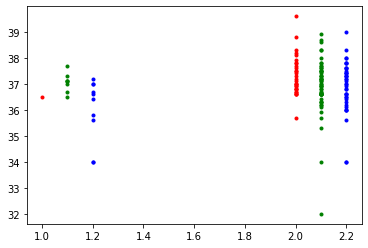

In [22]:
plt.plot(df0['Growth retardation'],df0['ADM TEMP'], 'r.')
plt.plot(df1['Growth retardation']+0.1,df1['ADM TEMP'], 'g.')
plt.plot(df2['Growth retardation']+0.2,df2['ADM TEMP'], 'b.')

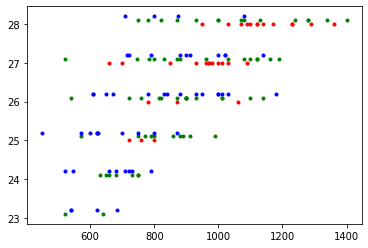

In [37]:
plt.plot(df0['Birth Weight (grams)'],df0['Birth Gestation (weeks)'], 'r.')
plt.plot(df1['Birth Weight (grams)'],df1['Birth Gestation (weeks)']+0.1, 'g.')
plt.plot(df2['Birth Weight (grams)']+0.2,df2['Birth Gestation (weeks)']+0.2, 'b.')

In [25]:
df0[['Birth Gestation (weeks)', 'Birth Weight (grams)', 'ADM TEMP']].describe()

,Birth Gestation (weeks),Birth Weight (grams),ADM TEMP
count,31.000000,31.000000,31.000000
mean,27.129032,1001.290323,37.303226
std,0.957146,174.542104,0.773944
min,25.000000,660.000000,35.700000
25%,27.000000,900.000000,36.800000
50%,27.000000,1010.000000,37.100000
75%,28.000000,1110.000000,37.750000
max,28.000000,1360.000000,39.600000


In [26]:
df1[['Birth Gestation (weeks)', 'Birth Weight (grams)', 'ADM TEMP']].describe()

,Birth Gestation (weeks),Birth Weight (grams),ADM TEMP
count,64.000000,64.000000,63.000000
mean,26.234375,901.484375,36.936508
std,1.422519,202.885298,1.016049
min,23.000000,520.000000,32.000000
25%,25.000000,757.500000,36.600000
50%,26.000000,880.000000,37.000000
75%,27.000000,1040.000000,37.500000
max,28.000000,1400.000000,38.900000


In [27]:
df2[['Birth Gestation (weeks)', 'Birth Weight (grams)', 'ADM TEMP']].describe()

,Birth Gestation (weeks),Birth Weight (grams),ADM TEMP
count,51.000000,51.000000,50.00000
mean,25.607843,781.862745,36.73600
std,1.386772,176.502014,1.07547
min,23.000000,450.000000,34.00000
25%,25.000000,637.500000,36.32500
50%,26.000000,750.000000,36.95000
75%,27.000000,905.000000,37.40000
max,28.000000,1180.000000,39.00000
